IMPORT DATASETS

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors._kd_tree import KDTree
import time
from data_utils import load_dataset


### Test

In [50]:
a = np.array([1,2,3,4])
b = np.array([4,4,4,4])
print(np.sum(a))

10


### Gradient Descent

- Hyperparameters
    - beta
    - eta
    

The Loss function is the 2 norm of ||y - Xw||, which the gradient is:

$\triangledown L(w) = 2X^T(Xw-y)$

Linear Regression Algorithm modified from Assignment 1

In [12]:
def linear_regression(x_train, y_train, x_test, w):
    # add a dummy one feature to each x_train and  point
    # Making X matrices
    x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
    x_test = np.hstack([np.ones((x_test.shape[0], 1)), x_test])
    # print(len(x_train)): Number of datapoints in D plus the dummy feature of all ones (D+1)
    # print(len(x_train[0])): The number of features (N)

    # Economy SVD
    U, sigma, V_t = scipy.linalg.svd(x_train, full_matrices=False, compute_uv=True)
    w = V_t.T.dot(U.T.dot(y_train) / np.reshape(sigma, (-1,1))) # -1 to let the program reshape by itself
    return x_test.dot(w) # the weighted prediction of test data

def lin_reg_loss(x, y, w):
    return np.mean(np.square(y - x.dot(w)))

    
def linear_regression_gradient(x, y, w):
    return 2 * x.T.dot(x.dot(w) - y) / len(x)

Full-Batch on pumadyn dataset

C:\Users\Brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Brian\AppData\Local\Temp\ipykernel_8160\3178989931.py:36: RuntimeWarning: overflow encountered in square
  l = np.mean(np.square(y_train - x_train.dot(w)))
C:\Users\Brian\AppData\Local\Temp\ipykernel_8160\341113367.py:21: RuntimeWarning: overflow encountered in multiply
  return 2 * x.T.dot(x.dot(w) - y)


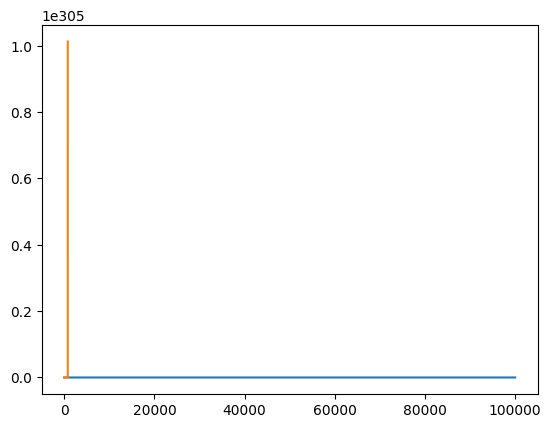

In [11]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')

x_train = np.vstack([x_train, x_valid])
y_train = np.vstack([y_train, y_valid])

# take the first 1000 points: add in the ones vector x_0
x_train = x_train[0:1000]
x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
y_train = y_train[0:1000]
# initialize the weight vector w = 0
w = np.zeros([len(x_train[0]), 1])

# choose hyperparameters: test on the dataset
# k = 1
# eta = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 100]
best_eta = None
best_eta_RMSE = float('inf')

stop = 100000
w = np.zeros([len(x_train[0]), 1])

# plotting 
loss = []
iterations = [x for x in range(1, stop+1)]


for eta in [0.0001, 0.001, 0.01, 0.1, 0.5, 1]:
    loss = [] # clear loss array between etas
    w = np.zeros([len(x_train[0]), 1])
    for k in range(stop):
        # gradient descent
        g = linear_regression_gradient(x_train, y_train, w)
        w = w - eta * g
        # loss for this iteration is the average of the l2 loss function
        l = lin_reg_loss(x_train, y_train, w)
        loss.append(l)

    # choose eta using the final weights
    if np.sqrt(np.mean(np.square(y_train - x_train.dot(w)))) < best_eta_RMSE:
        best_eta_RMSE = np.sqrt(np.mean(np.square(y_train - x_train.dot(w))))
        best_eta = eta
    plt.figure()
    plt.plot(iterations, loss)



















# for n in eta:
#     k = 1
#     # no need to store away weights in training 
#     w_k = np.zeros([len(x_train[0]), 1])
#     w_k_1 = np.zeros([len(x_train[0]), 1])
#     # stopping condition: #  10000 iterations
#     while k < stop:
#         w_k = w_k_1
#         # compute gradient of the l2 weight loss function, averaged over N:
#         g = 2 * x_train.T.dot(x_train.dot(w_k) - y_train)
#         # compute gradient descent update rule: WILL CHANGE DEPENDING ON METHOD
#         w_k_1 = w_k - (n/k) * g
#         # increment count
#         k += 1
#     # the prediction is x_train.dot(w_k_1)
#     if np.sqrt(np.mean(np.square(y_train - x_train.dot(w_k_1)))) < best_eta_RMSE:
#         best_eta_RMSE = np.sqrt(np.mean(np.square(y_train - x_train.dot(w_k_1))))
#         best_eta = n
#     print(w_k_1 - w_k)

# print('best eta:', n, ' with RMSE', best_eta_RMSE)


